<a href="https://colab.research.google.com/github/yajima-yasutoshi/DataMinig/blob/main/20231129/%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90%E3%81%AE%E6%BC%94%E7%BF%92%E3%81%AE%E8%A7%A3%E7%AD%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データマイニング第10回（2023/11/29）

#本日の講義の目的

回帰に関する講義内容を復習するための演習を行う。



# 環境の準備

In [1]:
# インストール
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=a3e4c58d3c709ac0c22b749bce4e887967ef08bd83079d776a35bebdc6ac1b84
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

# from sklearn.linear_model import LinearRegression

# データの準備
Kaggle のサイト

https://www.kaggle.com/datasets/vedavyasv/usa-housing

で公開されている、「USA_Housing」データを利用する。

必要な手順は以下の通り

1. 以下のサイトから USA_Housing.csv データを各自のPCにダウンロードする。

  https://github.com/yajima-yasutoshi/DataMinig/tree/main/20231129


1. Google Drive へアップロードする。
1. Google Colab で Google Drive をマウントする。


In [29]:
# 読み込むファイルを指定する
file_path = '/content/drive/MyDrive/周南公立大学/講義/データマイニング/データ/USA_Housing.csv'
df = pd.read_csv(file_path)

### データの概要

項目名 | 説明
-- | --
Avg. Area Income | 年収
Avg. Area House Age |  築年数
Avg. Area Number of Rooms |  部屋数
Avg. Area Number of Bedrooms |  寝室数
Area Population  |  人口
Price            |  住宅の価格
Address           |     住所

アメリカの住宅価格のデータ。地域毎に住民の年収や築年数などの平均がデータとして格納されている。

# 演習課題

上のデータを用いて、住宅価格（Price）を予測する回帰モデルを作成する。

## 基礎集計

データをデータフレームに読み込んだ後に、まず以下を確認する。

* レコード数
* 項目数
* 各項目の型
* 欠損値の有無
* 異常値（外れ値）の有無



In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [31]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


各項目に対しては、平均、最大、最小など基本統計量を確認する。

In [27]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4.999000e+03
mean,68593.268311,5.977428,6.987847,3.981626,36161.315865,1.232259e+06
std,10634.817414,0.991449,1.005926,1.234083,9925.423573,3.529080e+05
min,35454.714659,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61481.724998,5.322350,6.299156,3.140000,29403.789820,9.977230e+05
50%,68805.020731,5.970953,7.002940,4.050000,36198.440991,1.232872e+06
75%,75784.342192,6.650870,7.666100,4.490000,42852.508761,1.471389e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


<Axes: xlabel='Avg. Area Number of Rooms', ylabel='Count'>

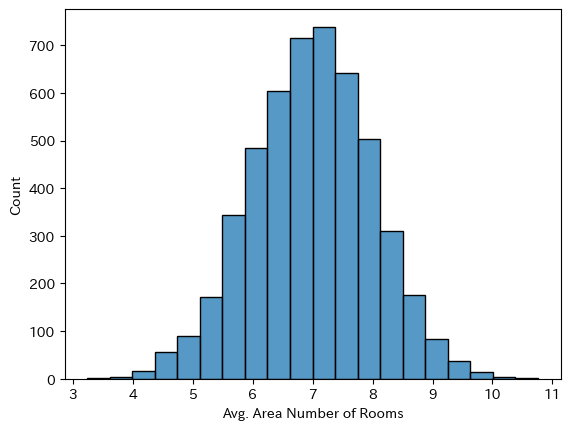

In [19]:
sns.histplot(df['Avg. Area Number of Rooms'], bins=20)

<Axes: ylabel='Avg. Area Income'>

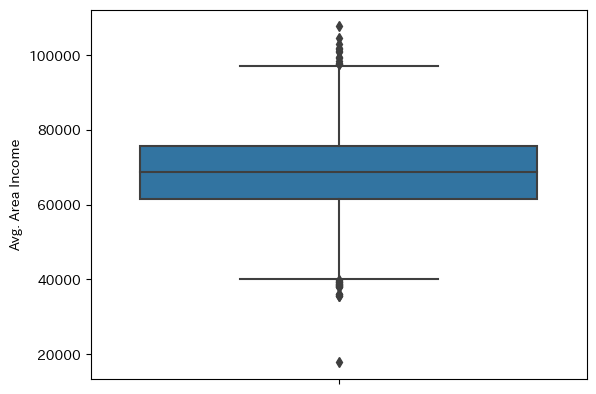

In [32]:
sns.boxplot(data=df, y='Avg. Area Income')

ここでは、'Avg. Area Income'の外れ値のみ削除することとする。

In [33]:
# 削除対象のレコードのインデックスを取得
indices_to_drop = df[df['Avg. Area Income'] < 20000].index

# 指定したインデックスのレコードを削除
df = df.drop(indices_to_drop)

<Axes: ylabel='Avg. Area Income'>

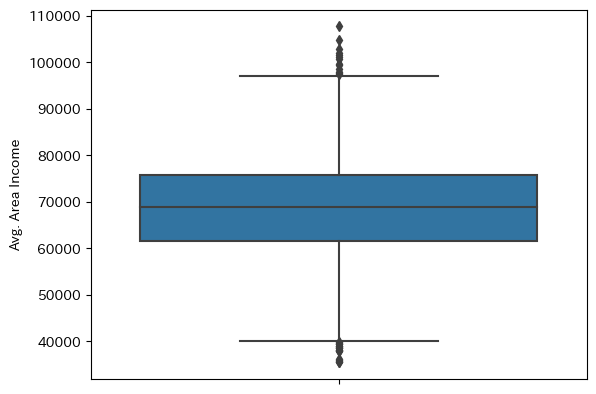

In [34]:
sns.boxplot(data=df, y='Avg. Area Income')

Avg. Area Income と Price の関係を可視化するために散布図を描く。

<Axes: xlabel='Avg. Area Income', ylabel='Price'>

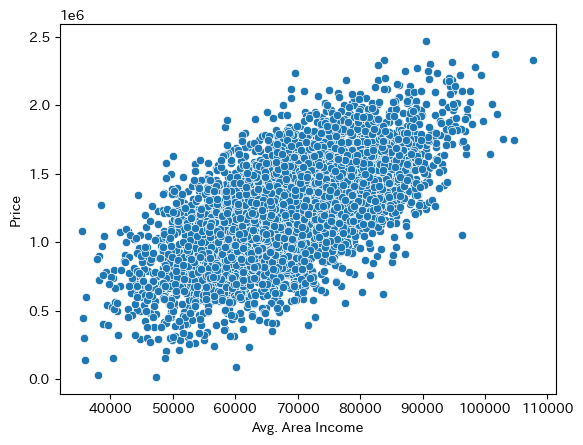

In [35]:
sns.scatterplot(x='Avg. Area Income', y='Price', data = df)

In [ ]:
sns.pairplot( data = df )

## 回帰モデルの作成

必要なライブラリーのインポート


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

まず、説明変数に'Avg. Area House Age'のみを用いて、'Price' を予測する回帰モデルを構築する。
ただし、学習用データとして全体の8割を用い、2割を評価用として用いる。

データの分割には、以下のコードを用いる。

In [38]:
# 線形回帰モデルを作成し、データにフィットさせます。
X = df[['Avg. Area House Age']]
y = df['Price']

# データを学習用と検証用に分割
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=2)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
# 回帰係数を出力
model.coef_

array([161152.31576287])

In [40]:
# 定数項を出力
model.intercept_

271745.76871463156

In [8]:
model.coef_ * 2 + model.intercept_

array([594515.28018816])

検証用データで決定係数を確認する。

In [41]:
# 検証用データで決定係数を確認する
y_pred = model.predict(X_validate)
r2 = r2_score(y_validate, y_pred)
r2

0.19969475967913297

次に、説明変数に
* 'Avg. Area Income'
* 'Avg. Area House Age'
* 'Avg. Area Number of Rooms'
* 'Area Population'

を用いて、'Price' を予測する回帰モデルを構築し、予測精度を確認する。

ただし、学習用データとして全体の8割を用い、2割を評価用として用いる。

データの分割には、以下のコードを用いる。

In [42]:
# 線形回帰モデルを作成し、データにフィットさせます。
X = df[
    ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Area Population'] ]
y = df['Price']

# データを学習用と検証用に分割
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=2)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

検証用データを使い、R2値を計算する。

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

# データで学習用データで予測
y_pred = model.predict(X_validate)
r2 = r2_score(y_validate, y_pred)
r2

0.918845989475704

In [45]:
model.coef_

array([2.15273682e+01, 1.65359409e+05, 1.21826839e+05, 1.51787852e+01])

In [13]:
testData = pd.DataFrame(
    data = {
     'Avg. Area Income' :    [63000.0, 80000.0, 80500.0],
     'Avg. Area House Age' : [7.2,         5.0,      8.1],
     'Avg. Area Number of Rooms' : [5.6,   6.1,      5.0],
     'Area Population' : [34300.0, 26748.0, 47220.0]
     }
)

In [ ]:
testData